In [1]:
import fastf1 as ff1
import fastf1.plotting

from matplotlib import pyplot as plt

ff1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
session = ff1.get_session(2023, 14, 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\sk\AppData\Local\Temp\fastf1.
	Size: 87.97 MB
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [3]:
year = 2023
d1 = 'VER'
d2 = 'SAI'
d3 = 'LEC'

d1L = session.laps.pick_driver(d1).pick_fastest()
d2L = session.laps.pick_driver(d2).pick_fastest()
d3L = session.laps.pick_driver(d3).pick_fastest()

d1T = d1L.get_car_data().add_distance()
d2T = d2L.get_car_data().add_distance()
d3T = d3L.get_car_data().add_distance()

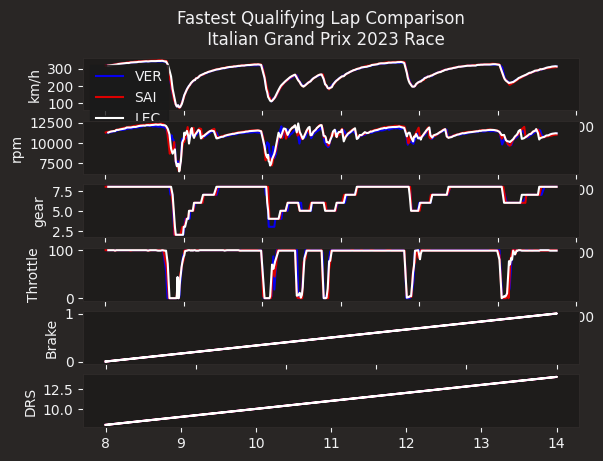

In [6]:
d1C = ff1.plotting.team_color('RBR')
d2C = ff1.plotting.team_color('FER')
d3C = ff1.plotting.team_color('HAA')

fi, ax = plt.subplots(6)
ax[0].plot(d1T['Distance'], d1T['Speed'], color=d1C, label=d1)
ax[0].plot(d2T['Distance'], d2T['Speed'], color=d2C, label=d2)
ax[0].plot(d3T['Distance'], d3T['Speed'], color=d3C, label=d3)
# ax[0].set_xlabel('m')
ax[0].set_ylabel('km/h')

ax[0].legend()

ax[1].plot(d1T['Distance'], d1T['RPM'], color=d1C, label=d1)
ax[1].plot(d2T['Distance'], d2T['RPM'], color=d2C, label=d2)
ax[1].plot(d3T['Distance'], d3T['RPM'], color=d3C, label=d3)
ax[1].set_ylabel('rpm')

ax[2].plot(d1T['Distance'], d1T['nGear'], color=d1C, label=d1)
ax[2].plot(d2T['Distance'], d2T['nGear'], color=d2C, label=d2)
ax[2].plot(d3T['Distance'], d3T['nGear'], color=d3C, label=d3)
ax[2].set_ylabel('gear')

ax[3].plot(d1T['Distance'], d1T['Throttle'], color=d1C, label=d1)
ax[3].plot(d2T['Distance'], d2T['Throttle'], color=d2C, label=d2)
ax[3].plot(d3T['Distance'], d3T['Throttle'], color=d3C, label=d3)
ax[3].set_ylabel('Throttle')

ax[4].plot(d1T['Brake'], d1T['Brake'], color=d1C, label=d1)
ax[4].plot(d2T['Brake'], d2T['Brake'], color=d2C, label=d2)
ax[4].plot(d3T['Brake'], d3T['Brake'], color=d3C, label=d3)
ax[4].set_ylabel('Brake')

ax[5].plot(d1T['DRS'], d1T['DRS'], color=d1C, label=d1)
ax[5].plot(d2T['DRS'], d2T['DRS'], color=d2C, label=d2)
ax[5].plot(d3T['DRS'], d3T['DRS'], color=d3C, label=d3)
ax[5].set_ylabel('DRS')


plt.suptitle(f"Fastest Qualifying Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Race")

plt.show()